In [19]:
import numpy as np
from af22c.proteome import MultipleSeqAlign
import matplotlib.pyplot as plt

In [20]:
prot = MultipleSeqAlign.from_a3m("../data/A0A0A0MRZ7.a3m")

100%|██████████| 9846/9846 [00:00<00:00, 85883.04it/s]


In [21]:
vocab = sorted(list(set("".join([str(prot.query_seq)] + [str(match.aligned_seq) for match in prot.matches]))))
"".join(vocab),len(vocab)

('-ACDEFGHIKLMNPQRSTVWXY', 22)

In [22]:
stoi = {c:i for i, c in enumerate(vocab)}
itos = {i:c for c, i in stoi.items()}

In [23]:
query_len = len(prot.query_seq)
num_matches = len(prot.matches)
num_seqs = num_matches + 1 # include query
query_len,num_matches,num_seqs

(120, 9844, 9845)

In [24]:
encmsa = np.zeros((num_seqs, query_len))
for seqidx, seq in enumerate([prot.query_seq] + [match.aligned_seq for match in prot.matches]):
    for colidx, colval in enumerate(seq):
        encmsa[seqidx, colidx] = stoi[colval]
encmsa.shape

(9845, 120)

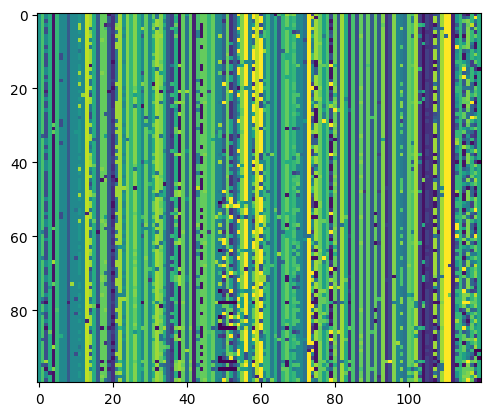

In [29]:
plt.imshow(encmsa[:100])

In [82]:
smallmsa = encmsa[:10,8:18]

Text(0.5, 0, 'AA index')

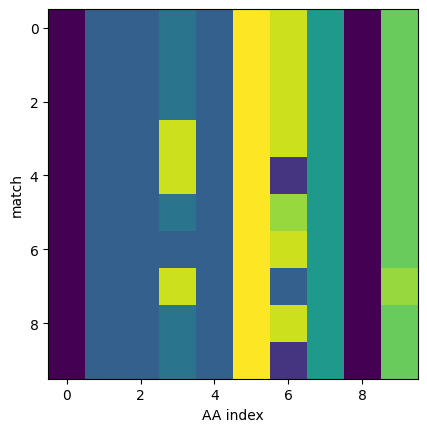

In [59]:
plt.imshow(smallmsa)
plt.ylabel("match")
plt.xlabel("AA index")

In [73]:
# pairwise hamming distances
pwdists = np.sum(smallmsa[None,:,:] != smallmsa[:,None,:], axis=-1)
# pairwise sequence identities = 1 - normalized hamming distances (each value divided by sequence length)
pwseq = 1 - pwdists / query_len

Text(0, 0.5, 'query seq idx')

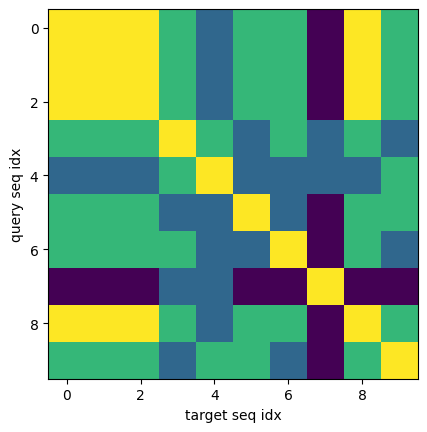

In [74]:
plt.imshow(pwseq)
plt.xlabel("target seq idx")
plt.ylabel("query seq idx")

In [78]:
pwseq[0,0],pwseq[0,3],pwseq[0,4],pwseq[0,7]

(1.0, 0.9916666666666667, 0.9833333333333333, 0.975)